# Exploratory Data Analys

In [36]:
# Importing essential librarries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the dataset as pandas dataframe:
df=pd.read_csv('./Data/AdultCensusIncome.csv')

In [4]:
# Getting the first 5 records of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Getting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Checking for unique records in all the columns:
for i in df.columns:
    print(f"Column name: {i}\n")
    print(df[i].unique())
    print('*'*30)

Column name: age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
******************************
Column name: workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
******************************
Column name: fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]
******************************
Column name: education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
******************************
Column name: education-num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
******************************
Column name: marital-status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-sp

#### From the above result, it is observed that workclass, occupation and country have null values represented as '?'.

In [25]:
df[df['fnlwgt']==' ?'] 
#The column 'fnlwgt' does not contain '?' as the above 3 columns have.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary


#### Lets remove extra spaces from the records, in short, lets strip the records.

In [27]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].map(str.strip)

In [29]:
df['workclass'].unique() 
# records stripped

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [54]:
# saving the column names having null values in a variable cols:
cols=['workclass','occupation','country']

In [55]:
# Counting the unique values in the columns containing null values
for i in cols:
    print(f"column name: {i}")
    print(df.groupby([i])[i].count())
    print('*'*40)

column name: workclass
workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64
****************************************
column name: occupation
occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
Name: occupation, dtype: int64
****************************************
column name: country
country
?                               583
Cambodia                         19
Canada                          121
China                       

In [57]:
# Checking for duplicate records:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


#### There are 24 duplicate records in the dataset, so these records should be removed from the dataset

In [58]:
# Drop the 24 duplicate records
df.drop_duplicates(keep='first',inplace=True)

In [60]:
# Shape of the dataset after dropping the duplicate rows
df.shape

(32537, 15)

In [62]:
# Checking for the null rerords in the columns
df.isnull().sum()
# No null record found in the dataset.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [63]:
# Now convert the '?' with nan
df.replace('?',np.nan,inplace=True)

In [91]:
# As the '?' is converted into nan, hence the dataset would contain some null records, lets check
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            582
salary               0
dtype: int64

#### There are some null values in 3 categorical columns, hence we have to handle the null values first, then proceed further.
#### As it is observed earlier, workclass column having 'private', occupation having 'Craft-repair' and country having 'United-States' as the most frequent records respectively.
#### So the null values can be replaced with the most frequent records in their own column.

In [99]:
df['workclass'].replace(np.nan,'Private', inplace=True)

In [106]:
df['occupation'].replace(np.nan, 'Craft-repair', inplace=True)

In [107]:
df['country'].replace(np.nan, 'United-States', inplace=True)

In [108]:
# Now no null value is present in the dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Observing the behaviour of the Target variable with respect to the input variables.

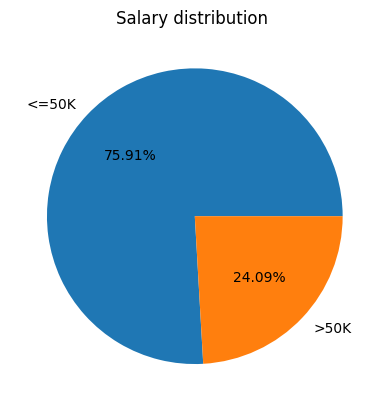

In [109]:
# Salary distribution among the people in the dataset
salary=df['salary'].value_counts()
plt.pie(salary,labels=salary.index,autopct="%1.2f%%")
plt.title("Salary distribution ")
plt.show()

#### There are 75.91% of people have income less than or equal to 50k and  24.09% of people have income more than 50k

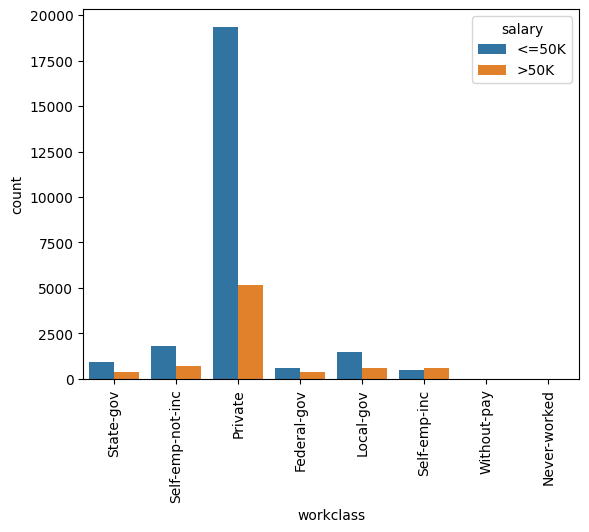

In [111]:
# Observing the distribution of salary slabs with respect to the workclass
sns.countplot(df,x='workclass',hue='salary')
plt.xticks(rotation=90)
plt.show()

#### 1. In the above result, it is observed that except self-emp-inc, in every workclass more people earns <=50k as compared to number of people who earns >50k.
#### 2. Most of the people works in private sector.

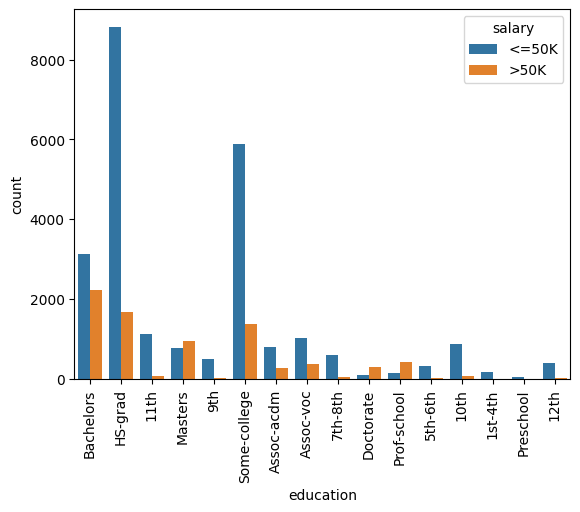

In [113]:
# Observing the distribution of salary based on education
sns.countplot(df,x='education',hue='salary')
plt.xticks(rotation=90)
plt.show()

#### It is observed that 